<a href="https://colab.research.google.com/github/jamieturnerBSU/GEOS518_F24_jamieturner/blob/main/mod01_Assignment_JamieTurner1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 01: Jupyter Notebook Assignment

## Name:

### Part I: Instructions

In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in [the example notebook](./mod01-PythonIntro-1.ipynb) with the following parameters:

* `Nt` = 200
* `mu_x` = 1.5
* `s_x` = 2.1
* `min_x` = 1.25

Where `min_x` is a new parameter that is the _minimum step size_ at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than `min_x` by using a `while` loop to keep generating step sizes until the step size exceeds `min_x`. Do this for `Nx` = 1,000 random walkers.

___Deliverables:___

1. Code to create the random walk with comments
2. Reproduce the 2 figures in section 5.1 and 5.2 of the example notebook (__Note__: you will have to adjust the `bins` and `range` parameters provided to histogram).

In [ ]:
# JAMIE TURNER, 8/30/2024
#
# ASSIGNMENT 1
# GEOS 518

In [42]:
import numpy as np
import matplotlib.pyplot as plt # GET NEEDED MODULES FROM IMPORT

Nt = 200 # TIME STEPS NUMBER
Nx = 1000 # NUMBER OF WALKERS

mu_x = 1.5
s_x = 2.1
min_x = 1.25
# ^ PARAMETERS OF X

In [43]:
Nx = 1000 # Initialize the number of walkers. Nt is 1000

# Create a new container for all walkers at each time step. This will correspond to an
# array of zeros that has Nt rows and Nx columns. So each row corresponds to a specific
# time step and each column corresponds to a specific walker.
X = np.zeros((Nt,Nx))

# create a loop for each time step.
for i in np.arange(Nt):

    # The for loop below loops through each walker. It is 'nested' within the
    # time for loop
    for j in np.arange(Nx):

        # Calculate the random step size for the j^th walker at the i^th time step
        # Include a "WHILE" loop w/ an indicator variable to repeat creation of step size
        # until step size >= min_x
        num = 0
        while num == 0:
           x_i = s_x*np.random.randn() + mu_x
           if x_i <= min_x:
              num += 0
           else:
              num += 1

        # Again check to see if first time step
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = 0.0 + x_i
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i


In [48]:
print(X) # TEST STATEMENT

[[  3.05531422   2.0832971    3.95669095 ...   6.04106648   3.31053976
    2.5051911 ]
 [  4.99728851   6.13152231   7.00046885 ...   7.46287434   6.1611562
    4.24844426]
 [  6.71800037  10.47362881   8.35030757 ...  10.45218965  10.39197944
    6.13091976]
 ...
 [592.32027375 578.25779685 596.80117756 ... 569.42381382 617.75324024
  621.06996425]
 [594.10579132 582.44421981 600.00096787 ... 570.80651712 619.32554454
  626.06263743]
 [597.05291284 586.70082939 601.56040221 ... 573.22766823 621.06941238
  627.74046791]]


Text(0, 0.5, 'Distance Traveled [m]')

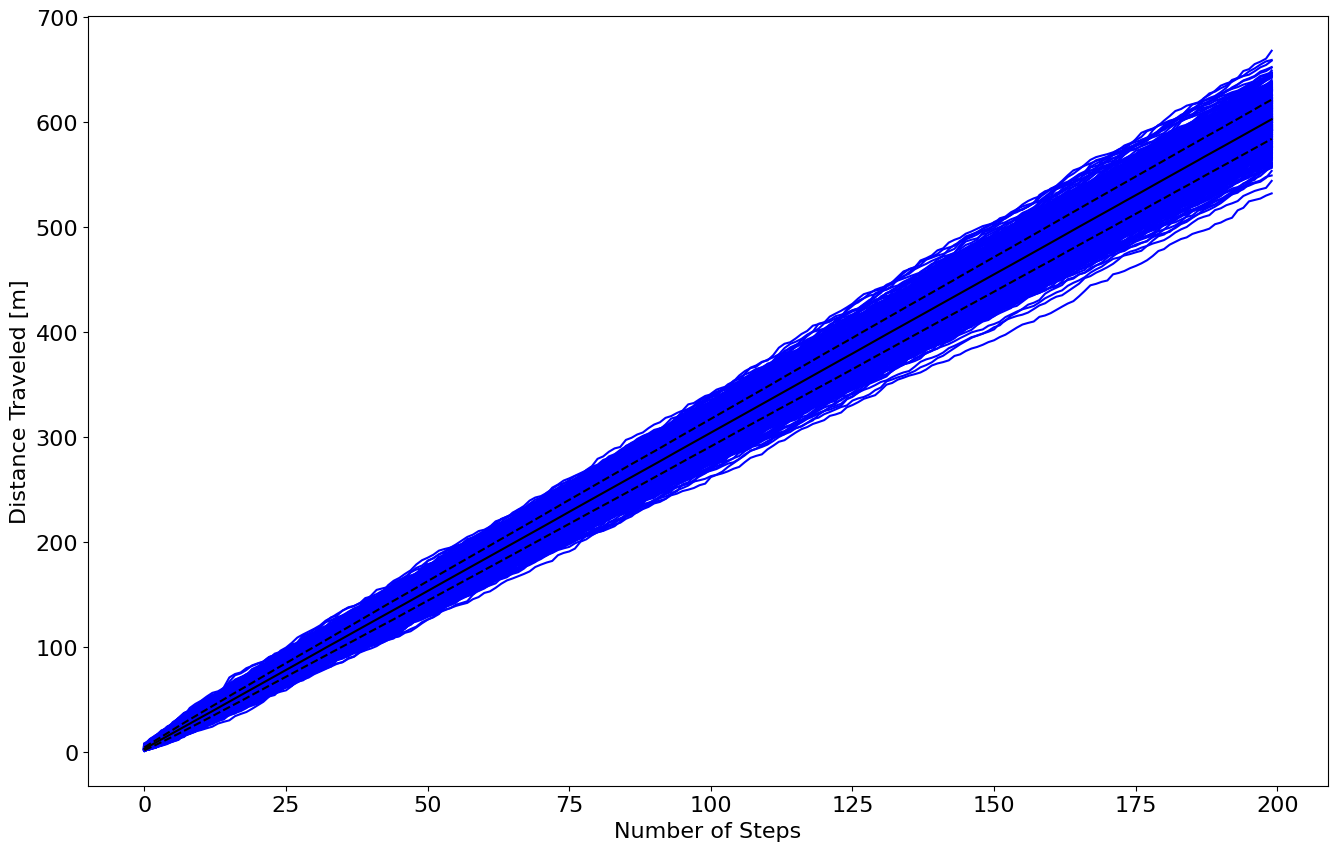

In [45]:
# REPRODUCING FIGURE 5.1 W/ NEW MU, STD DEV, AND MIN_X

mean_X = np.mean(X,axis=1) # Calculate the average distance of all walkers through time
std_X = np.std(X,axis=1) # Calculate the standard deviation of all walkers through time

plt.figure(figsize=(16,10)) # MAKE 16" X 10" PLOT

plt.plot(np.arange(Nt),X,'b-') # GRAPH X VALUES VS Nt (TIME STEP) VALUES (BLUE LINE)
plt.plot(np.arange(Nt),mean_X,'k-') # plot mean values of x versus time steps on the same plot (BLACK LINE)
plt.plot(np.arange(Nt),mean_X + std_X, 'k--') # PLOT THRESHOLD 1 STD DEVIATION ABOVE MEAN
plt.plot(np.arange(Nt),mean_X - std_X, 'k--') # PLOT THRESHOLD 1 STD DEVIATION BELOW MEAN
plt.xlabel('Number of Steps')
plt.ylabel('Distance Traveled [m]') # LABEL X AND Y

Text(0, 0.5, 'Frequency [-]')

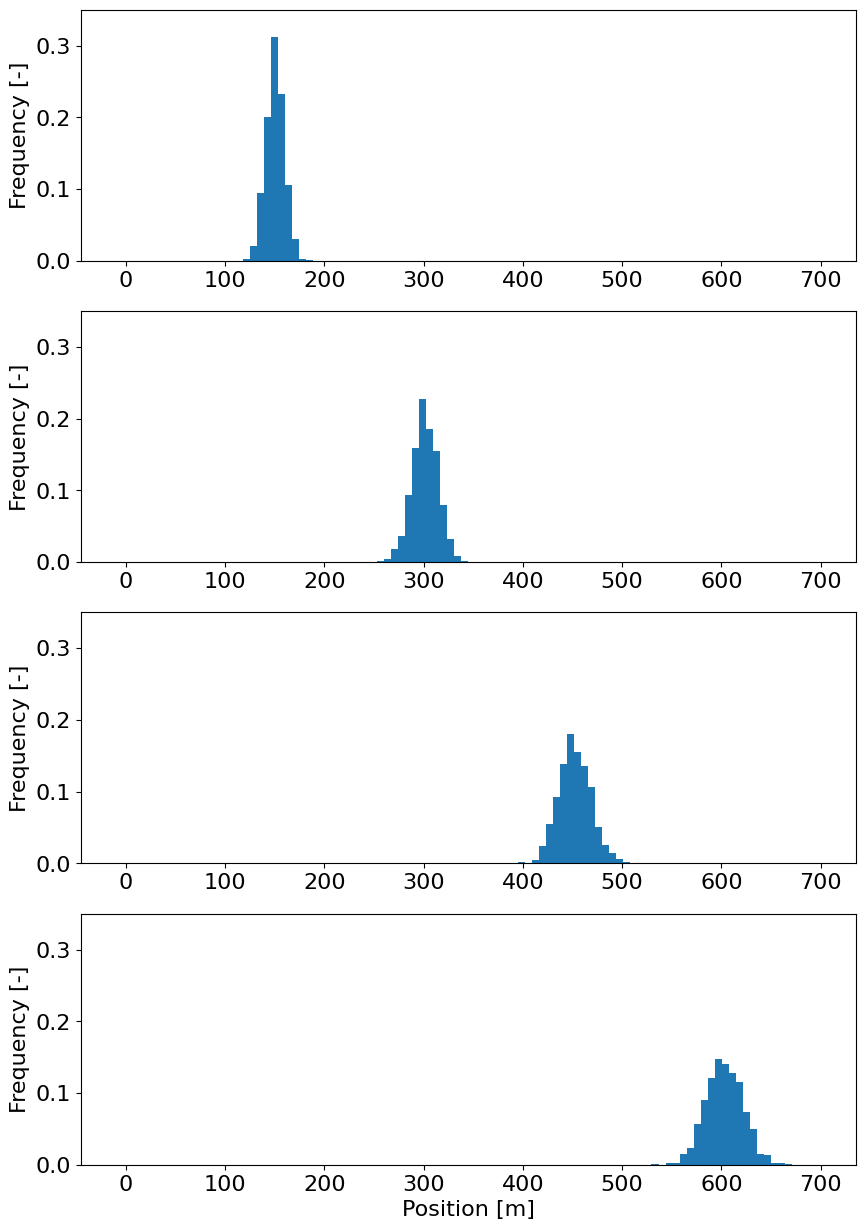

In [50]:
# REPRODUCING FIGURE 5.2 W/ NEW MU, STD DEV, AND MIN_X

x_50, be_50 = np.histogram(X[49,:], bins=100, range=(-10.0,700)) # COMPUTES FREQ & HISTOGRAM FOR 5OTH ROW OF X, PUT INTO 100 BINS BOUNDED BY -10, 700
x_100, be_100 = np.histogram(X[99,:], bins=100, range=(-10.0,700)) # COMPUTES FREQ & HISTOGRAM FOR 100TH ROW OF X, PUT INTO 100 BINS BOUNDED BY -10, 700
x_150, be_150 = np.histogram(X[149,:], bins=100, range=(-10.0,700)) # COMPUTES FREQ & HISTOGRAM FOR 150TH ROW OF X, PUT INTO 100 BINS BOUNDED BY -10, 700
x_200, be_200 = np.histogram(X[-1,:], bins=100, range=(-10.0,700)) # COMPUTES FREQ & HISTOGRAM FOR FINAL ROW OF X, PUT INTO 100 BINS BOUNDED BY -10, 700

plt.figure(figsize=(10,15)) # MAKE BIG PLOT
plt.subplot(4,1,1) # FIRST OF 4 ROWS, 1 COLUMN
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0])) # CALCULTATES THE NORMALIZED FREQ, PLOTS ALONG BIN MIDPOINTS, WIDTH = 1st bin width
plt.ylim((0.0,0.35)) # REDUCE Y-AXIS LIMIT TO 0.35
plt.ylabel('Frequency [-]')
# FREQUENCY OF VALUES IN THE 25TH PERCENTILE OF THE ARRAY?

plt.subplot(4,1,2) # 2ND OF 4 ROWS, 1 COLUMN
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0])) # CALCULTATES THE NORMALIZED FREQ, PLOTS ALONG BIN MIDPOINTS
plt.ylim((0.0,0.35))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,3) # 3RD OF 4 ROWS, 1 COLUMN
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0]))
plt.ylim((0.0,0.35))
plt.ylabel('Frequency [-]')

plt.subplot(4,1,4) # 4TH OF 4 ROWS, 1 COLUMN
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0]))
plt.ylim((0.0,0.35))
plt.xlabel('Position [m]')
plt.ylabel('Frequency [-]')

### Part II: Instructions

In this part of the assignment, your task is to create a __two-dimensional__ random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are _independent_ of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa. Use the following parameters:

* Nt = 300
* Nx = 3
* mu_x = 0.5
* s_x = 1.5
* mu_y = 5.0
* s_y = 2.5

Where `mu_y` and `s_y` are, respectively, the average and standard deviation of the step size in the y-direction.

___Deliverables___

1. Code to create the random walk with comments
2. Plot the position of all three random walkers at each step of their respective random walks on the ___same plot___.

In [38]:
Nt = 300
Nx = 3

mu_x = 0.5
s_x = 1.5
mu_y = 5.0
s_y = 2.5


In [35]:
Nx = 3 # Initialize the number of walkers = 3

# Create a new container for all walkers at each time step. This will correspond to an
# array of zeros that has Nt rows and Nx columns. So each row corresponds to a specific
# time step and each column corresponds to a specific walker.
X = np.zeros((Nt,Nx))
Y = np.zeros((Nt,Nx))

# create a loop for each time step.
for i in np.arange(Nt):

    # The for loop below loops through each walker. It is 'nested' within the
    # time for loop
    for j in np.arange(Nx):

        # Calculate the random step size for the j^th walker at the i^th time step
        x_i = s_x*np.random.randn() + mu_x
        y_i = s_y*np.random.randn() + mu_y

        # Again check to see if we're at the first time step
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = 0.0 + x_i
            Y[i,j] = 0.0 + y_i
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i
            Y[i,j] = Y[i-1,j] + y_i

In [36]:
# TEST STATEMENT
print(X)
print(Y)

[[ 1.58792182e+00  1.55127852e+00  1.60987398e+00]
 [ 3.06037271e+00  2.95033052e+00  2.42161883e+00]
 [ 3.47394203e+00  3.38492724e+00 -4.41352122e-02]
 [ 3.83942836e+00  2.59616634e+00 -9.22485029e-01]
 [ 5.35836800e+00  2.00836865e+00  1.79060184e+00]
 [ 6.91674277e+00  2.07091153e+00 -9.70601384e-02]
 [ 7.77882504e+00  1.70983744e+00  2.77233992e+00]
 [ 6.98330019e+00  2.68306231e+00  1.95521386e+00]
 [ 1.01961907e+01  5.37386736e+00  2.52769561e+00]
 [ 1.28936463e+01  4.53301182e+00  2.37906973e+00]
 [ 1.29907838e+01  5.26896667e+00  3.19858340e+00]
 [ 1.16774198e+01  4.78887671e+00  2.09391285e+00]
 [ 1.30774693e+01  3.94481952e+00 -1.22141777e-01]
 [ 1.33865448e+01  5.03184974e+00  3.54142908e+00]
 [ 1.35245165e+01  5.43856801e+00  5.10362629e+00]
 [ 1.57541147e+01  7.11035496e+00  5.00216437e+00]
 [ 1.52414821e+01  5.45120163e+00  4.38539645e+00]
 [ 1.54541177e+01  5.17659239e+00  5.09977044e+00]
 [ 1.85410648e+01  5.77416582e+00  5.18124837e+00]
 [ 1.75423084e+01  5.79283452e+

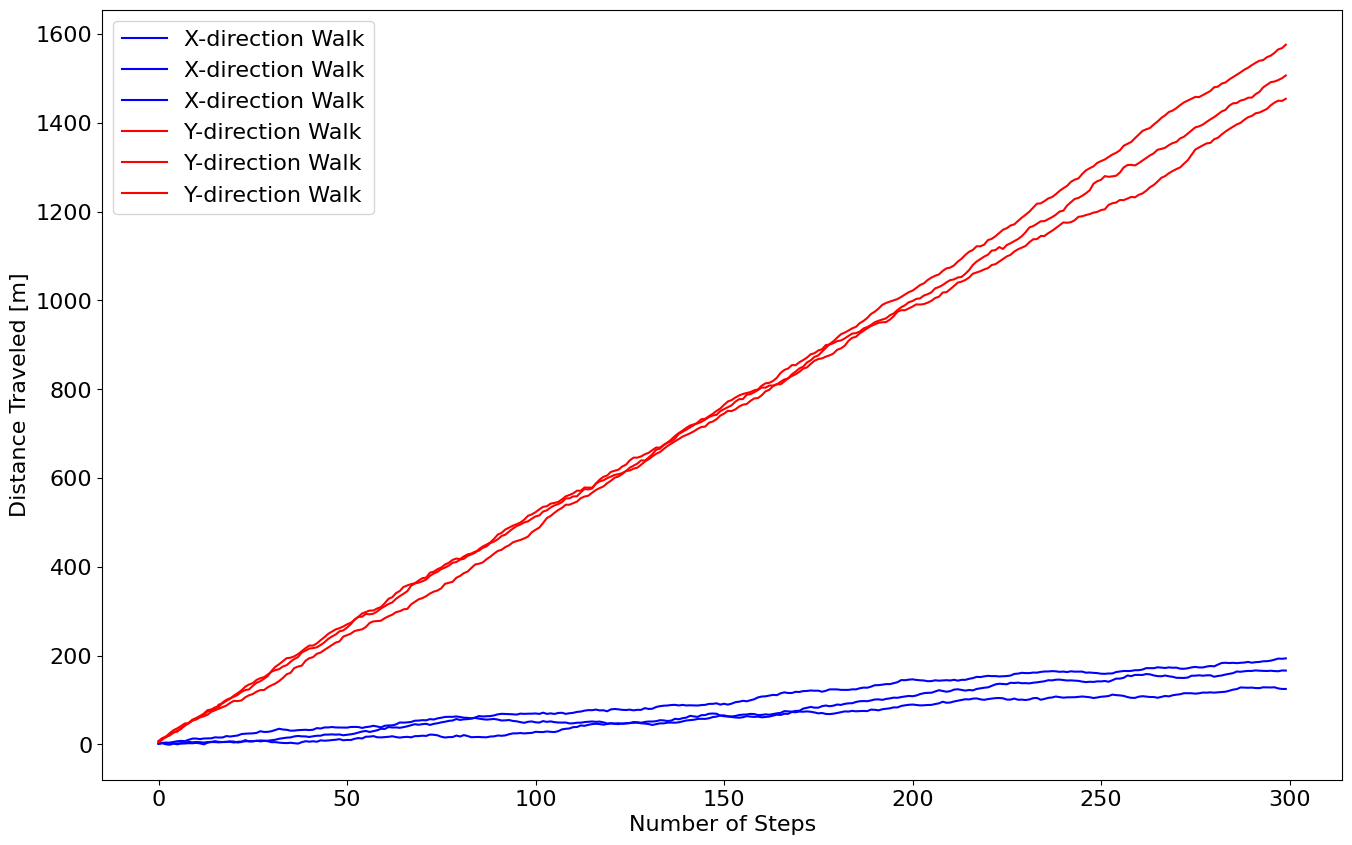

In [40]:
# PLOTTING BOTH SETS OF WALKS ON THE SAME PLOT (TWO-DIMENSIONAL WALKER)

plt.figure(figsize=(16,10)) # Create figure 16" wide by 10" tall

plt.plot(np.arange(Nt),X,'b-',label='X-direction Walk') # Plot the location of x walkers versus time as blue lines
plt.plot(np.arange(Nt),Y,'r-',label='Y-direction Walk') # Plot the location of y walkers versus time as red lines
plt.xlabel('Number of Steps') # Label the x-axis
plt.ylabel('Distance Traveled [m]') # Label the y-axis
plt.legend()